#Install & Import libraries#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tweet-preprocessor
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=3e6ebe864f09b78353798ed5deef1ba956da34f3408af5a4bf00f56d1286618e
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
import preprocessor as p
import numpy as np
import pandas as pd
import emoji
import pickle
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, GRU,SimpleRNN , Embedding, BatchNormalization
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils, pad_sequences
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tqdm import tqdm

#Data Preparation#

In [ ]:
data = pd.read_csv("text_emotion.csv")
data=data[['sentiment','content']]
# data.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
# data.loc[data['sentiment'] == 'sadness', 'sentiment'] = 'sad'
data.sentiment.value_counts()

worry       9892
happy       9270
sad         5165
love        3842
surprise    2187
Name: sentiment, dtype: int64

In [ ]:
labels_to_remove = ['neutral']

# Drop rows that contain the labels to remove
data3 = data3[~data3['Emotion'].isin(labels_to_remove)]

In [ ]:
data2.loc[data2['label'] == 'stress', 'label'] = 'worry'

In [ ]:
data4.loc[data4['emotion'] ==1, 'emotion'] = 'happy'

In [ ]:
# data51 = pd.read_csv("emotion-labels-train.csv")
# data52 = pd.read_csv("emotion-labels-test.csv")
# data53 = pd.read_csv("emotion-labels-val.csv")
# data5=pd.concat([data51, data52,data53])
data5.label.value_counts()

worry    3953
happy    1616
sad      1533
Name: label, dtype: int64

In [ ]:
# # Define a function to extract the label
# def get_label(row):
#     if row['emotion.anger'] == 1:
#         return 'worry'
#     elif row['emotion.fear'] == 1:
#         return 'worry'
#     elif row['emotion.sadness'] == 1:
#         return 'sad'
#     elif row['emotion.disgust'] == 1:
#         return 'worry'
#     elif row['emotion.joy'] == 1:
#         return 'happy'
#     elif row['emotion.surprise'] == 1:
#         return 'surprise'
#     else:
#       pass

# # Apply the function to create the new label column
# data6['label'] = data6.apply(lambda row: get_label(row), axis=1)

# # Drop the original emotion columns
# data6 = data6.drop(['image', 'emotion.anger', 'emotion.anticipation',
#        'emotion.disgust', 'emotion.fear', 'emotion.joy', 'emotion.sadness',
#        'emotion.surprise', 'emotion.trust', 'relation.complementary',
#        'relation.decorative', 'relation.illustrative', 'relation.image only',
#        'relation.opposite', 'stimulus.ad', 'stimulus.animal',
#        'stimulus.art/drawing', 'stimulus.event/situation', 'stimulus.food',
#        'stimulus.meme', 'stimulus.object', 'stimulus.person', 'stimulus.place',
#        'stimulus.screenshot'], axis=1)
data6.label.value_counts()

happy       499
worry       378
surprise    100
sad          74
Name: label, dtype: int64

In [ ]:
current_names = list(data6.columns)

# Define a dictionary to map current column names to new names
column_map = {
    current_names[0]: 'content',
    current_names[1]: 'sentiment'
}

# Rename the columns in df1
data6 = data6.rename(columns=column_map)

#DATA AUGMENTATION USING NLP


In [ ]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 6.6 MB/s eta 0:00:00
  Preparing met

In [ ]:
from textattack.augmentation import EmbeddingAugmenter
import random

aug_data_final = []
aug_label_final = []
for i in range(0,100,10):
  def textattack_data_augment(data, target, texattack_augmenter):
    aug_data = []
    aug_label = []
    for text, label in zip(data, target):
      if random.randint(0,2) != 1:
        aug_data.append(text)
        aug_label.append(label)
        continue
      aug_list = texattack_augmenter.augment(text)
      aug_data.append(text)
      aug_label.append(label)
      aug_data.extend(aug_list)
      aug_label.extend([label]*len(aug_list))
    return aug_data, aug_label
  print("-----",i)
  embed_aug = EmbeddingAugmenter(pct_words_to_swap=0.2, transformations_per_example=1)
  aug_data, aug_lable = textattack_data_augment(love_data['clean_content'][i*1000:(i+1)*1000], love_data['sentiment_id'][i*1000:(i+1)*1000], embed_aug)
  aug_data_final.extend(aug_data)
  aug_label_final.extend(aug_lable)



textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.


----- 0


100%|██████████| 481M/481M [00:13<00:00, 36.8MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpdfwdjiwa.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


----- 10
----- 20
----- 30
----- 40
----- 50
----- 60
----- 70
----- 80
----- 90


In [ ]:
love_data = pd.read_csv("love_dataset.csv")
love_data

,clean_content,sentiment_id
0,agreed,3
1,correct! I ADORE him I just plucked him up and...,3
2,sounds good Appreciate the suggestion Been a w...,3
3,Pats in philly at 2 am I love it Mmm cheeseste...,3
4,thanks neemah I m gonna be soooo close to you ...,3
...,...,...
100296,is wishing all of the mamas s out there a very...,3
100297,is wishing all of the mamma s out there a very...,3
100298,is wishing all of the mammy s out there a very...,3
100299,is wishing all of the mammy s out there a very...,3


In [ ]:
love_data = data1[data1['sentiment_id'] == 3]
love_data

,clean_content,sentiment_id
13,agreed,3
64,correct! I ADORE him I just plucked him up and...,3
82,sounds good Appreciate the suggestion Been a w...,3
89,Pats in philly at 2 am I love it Mmm cheeseste...,3
99,thanks neemah I m gonna be soooo close to you ...,3
...,...,...
30329,to my pretty lady HAPPY MOTHER S DAY!!! She s ...,3
30340,His snoring is so annoying n it keeps me from ...,3
30342,Happy Mothers Day All my love,3
30343,Happy Mother s Day to all the mommies out ther...,3


#PREPROCESSING DATA


*Misspelled data*

In [ ]:
misspell_data = pd.read_csv("aspell.txt",sep=":",names=["correction","misspell"])
misspell_data.misspell = misspell_data.misspell.str.strip()
misspell_data.misspell = misspell_data.misspell.str.split(" ")
misspell_data = misspell_data.explode("misspell").reset_index(drop=True)
misspell_data.drop_duplicates("misspell",inplace=True)
miss_corr = dict(zip(misspell_data.misspell, misspell_data.correction))

#Sample of the dict
{v:miss_corr[v] for v in [list(miss_corr.keys())[k] for k in range(20)]}

{'nevade': 'Nevada',
 'presbyterian': 'Presbyterian',
 'rsx': 'RSX',
 'Steffen': 'Stephen',
 'susan': 'Susan',
 'abilitey': 'ability',
 'abouy': 'about',
 'absorbtion': 'absorption',
 'accidently': 'accidentally',
 'accomodate': 'accommodate',
 'acommadate': 'accommodate',
 'acord': 'accord',
 'aquantance': 'acquaintance',
 'equire': 'acquire',
 'adultry': 'adultery',
 'aggresive': 'aggressive',
 'alchohol': 'alcohol',
 'alchoholic': 'alcoholic',
 'allieve': 'alive',
 'alright': 'all_right'}

In [ ]:
def misspelled_correction(val):
    for x in val.split():
        if x in miss_corr.keys():
            val = val.replace(x, miss_corr[x])
    return val

data["clean_content"] = data.Content.apply(lambda x : misspelled_correction(x))

In [ ]:
data[['Content','clean_content']].head()

,Content,clean_content
0,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...
1,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
2,wants to hang out with friends SOON!,wants to hang out with friends SOON!
3,Re-pinging @ghostridah14: why didn't you go to...,Re-pinging @ghostridah14: why didn't you go to...
4,"I should be sleep, but im not! thinking about ...","I should be sleep, but im not! thinking about ..."


*Contractions*

In [ ]:
contractions = pd.read_csv("contractions.csv")
cont_dic = dict(zip(contractions.Contraction, contractions.Meaning))
{v:cont_dic[v] for v in [list(cont_dic.keys())[k] for k in range(10)]}

{"'aight": 'alright',
 "ain't": 'is not',
 "amn't": 'am not',
 "aren't": 'are not',
 "can't": 'cannot',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not'}

In [ ]:
def cont_to_meaning(val):
    for x in val.split():
        if x in cont_dic.keys():
            val = val.replace(x, cont_dic[x])
    return val

In [ ]:
data.clean_content = data.clean_content.apply(lambda x : cont_to_meaning(x))

*Remove URLs and mentions*

In [ ]:
p.set_options(p.OPT.MENTION, p.OPT.URL)
p.clean("hello guys @alx #sport🔥 1245 https://github.com/s/preprocessor")

'hello guys #sport🔥 1245'

In [ ]:
data["clean_content"]=data.Content.apply(lambda x : p.clean(x))

*Punctuations and Emojis*

In [ ]:
def punctuation(val):

    punctuations = '''()-[]{};:'"\,<>./@#$%^&_~'''

    for x in val.lower():
        if x in punctuations:
            val = val.replace(x, " ")
    return val

In [ ]:
punctuation("test @ #ldfldlf??? !! ")

'test    ldfldlf??? !! '

In [ ]:
data.clean_content = data.clean_content.apply(lambda x : ' '.join(punctuation(emoji.demojize(x)).split()))

In [ ]:
def clean_text(val):
    val = misspelled_correction(val)
    val = cont_to_meaning(val)
    val = p.clean(val)
    val = ' '.join(punctuation(emoji.demojize(val)).split())

    return val

In [ ]:
clean_text("isn't 💡 adultry @ttt good bad https://google.com... ! ? ")

'is not light bulb adultery good bad ! ?'

*Remove Empty Comment*

In [ ]:
data = data[data.clean_content != ""]

In [ ]:
data.Sentiment.value_counts()

happy       178164
sad         150050
worry        31100
surprise      6748
love          3841
Name: Sentiment, dtype: int64

In [ ]:
import pandas as pd
emotion_data = pd.read_csv('/content/drive/My Drive/aug_emotion_data.csv')
emotion_data

,Unnamed: 0,clean_content,sentiment_id
0,0,RT Your anxiety might have represented a crush...,0
1,1,So not pumped for this interview nervous,0
2,2,so my boss told me today that I am on vacation...,4
3,3,could feel humiliated bn detachment realized n...,2
4,4,Even in the 1930s the anti Semitism of literar...,0
...,...,...,...
722060,722060,has a headaches already? ooh,4
722061,722061,feel sheepishly triumphant oxymoron know,1
722062,722062,feel like going vomit excited nervous,1
722063,722063,literally feel like someone broke no reason,2


#Modeling#

*Encoding the DATA and Train test Split*

In [ ]:
sent_to_id  = {"worry":0,"happy":1,"sad":2, "love":3, "surprise":4}

In [ ]:
# data["sentiment_id"] = data['Sentiment'].map(sent_to_id)

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(emotion_data.sentiment_id)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(emotion_data.clean_content,Y, random_state=1995, test_size=0.2, shuffle=True)

In [ ]:
len(X_train),len(X_test)

(577652, 144413)

In [ ]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 160
Epoch = 1
token.fit_on_texts(list(X_train) + list(X_test))
X_train_pad = pad_sequences(token.texts_to_sequences(X_train), maxlen=max_len)
X_test_pad = pad_sequences(token.texts_to_sequences(X_test), maxlen=max_len)

In [ ]:
w_idx = token.word_index
len(w_idx)

118412

In [ ]:
embed_dim = 200
lstm_out = 256

model = Sequential()
model.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(units=lstm_out, dropout=0.5, recurrent_dropout=0.5)))
# model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
#adam rmsprop
model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 200)          23682600  
                                                                 
 spatial_dropout1d (SpatialD  (None, 160, 200)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 512)              935936    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [ ]:
batch_size = 64

In [ ]:
model.fit(X_train_pad, y_train, epochs = Epoch, batch_size=batch_size,validation_data=(X_test_pad, y_test))

5106/9026 [===============>..............] - ETA: 1:34:30 - loss: 0.5931 - accuracy: 0.7811

In [ ]:
# Save the trained model to a file using pickle
with open('model_lSTM_01_aug.pkl', 'wb') as f:
    pickle.dump(model, f)

# with open('model_lSTM02.pkl', 'rb') as f:
#     model=pickle.load(f)


In [ ]:
from google.colab import files

# download the file to your local machine
files.download('model_lSTM_01_aug.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
shutil.copyfile('model_lSTM_01_aug.pkl', '/content/drive/My Drive/model_lSTM_01_aug.pkl')

'/content/drive/My Drive/aug_emotion_data.csv'

In [ ]:
!ls '/content/drive/My Drive'

 audio-dataset	        new_filename.mp4   video_with_python.mp4
 aug_emotion_data.csv   output_video.mp4
'Colab Notebooks'      'text2video '


*Test LSTM Result*

In [ ]:
from sklearn.metrics import classification_report

# assume y_true and y_pred are the ground truth labels and predicted labels respectively

# y_pred= model.predict(X_test)

twt = token.texts_to_sequences(X_test[0:1000])
twt = pad_sequences(twt, maxlen=max_len, dtype='int32')
sentiment = model.predict(twt,batch_size=1,verbose = 2)
max_sentiment = np.argmax(sentiment, axis=1)
output_array = np.zeros((len(max_sentiment), 5))

# set the corresponding index to 1 for each row
for i, val in enumerate(max_sentiment):
    output_array[i, val] = 1

# output array
print(output_array)
report = classification_report(y_test[0:1000], output_array)

print(report)

1000/1000 - 94s - 94s/epoch - 94ms/step
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       256
           1       0.96      0.89      0.93       237
           2       0.96      0.92      0.94       213
           3       0.97      0.96      0.96       157
           4       0.91      0.93      0.92       137

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000
 samples avg       0.93      0.93      0.93      1000



[Text(0, 0.5, 'worry'),
 Text(0, 1.5, 'happy'),
 Text(0, 2.5, 'sad'),
 Text(0, 3.5, 'love'),
 Text(0, 4.5, 'surprise')]

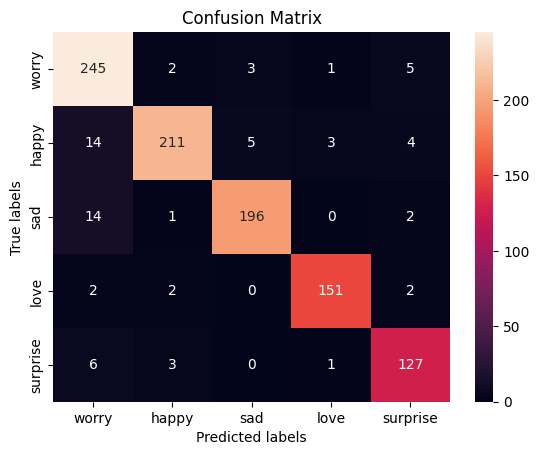

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

T5_lables = ['worry','happy','sad','love','surprise']

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test[0:1000]).argmax(axis=1), np.asarray(output_array).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables)
ax.yaxis.set_ticklabels(T5_lables)

In [ ]:
def get_sentiment(model,text):
    text = clean_text(text)
    #tokenize
    twt = token.texts_to_sequences([text])
    twt = pad_sequences(twt, maxlen=max_len, dtype='int32')
    sentiment = model.predict(twt,batch_size=1,verbose = 2)
    sent = np.round(np.dot(sentiment,100).tolist(),0)[0]
    result = pd.DataFrame([sent_to_id.keys(),sent]).T
    result.columns = ["sentiment","percentage"]
    result=result[result.percentage !=0]
    return result

In [ ]:
def plot_result(df):
    #colors=['#D50000','#000000','#008EF8','#F5B27B','#EDECEC','#D84A09','#019BBD','#FFD000','#7800A0','#098F45','#807C7C','#85DDE9','#F55E10']
    #fig = go.Figure(data=[go.Pie(labels=df.sentiment,values=df.percentage, hole=.3,textinfo='percent',hoverinfo='percent+label',marker=dict(colors=colors, line=dict(color='#000000', width=2)))])
    #fig.show()
    colors={'love':'rgb(213,0,0)','empty':'rgb(0,0,0)',
                    'sad':'rgb(0,142,248)','enthusiasm':'rgb(245,178,123)',
                    'neutral':'rgb(237,236,236)','worry':'rgb(216,74,9)',
                    'surprise':'rgb(1,155,189)','fun':'rgb(255,208,0)',
                    'hate':'rgb(120,0,160)','happy':'rgb(9,143,69)',
                    'boredom':'rgb(128,124,124)','relief':'rgb(133,221,233)',
                    'anger':'rgb(245,94,16)'}
    col_2={}
    for i in result.sentiment.to_list():
        col_2[i]=colors[i]
    fig = px.pie(df, values='percentage', names='sentiment',color='sentiment',color_discrete_map=col_2,hole=0.3)
    fig.show()

In [ ]:
result =get_sentiment(model,"I can't believe this crap! Are you seriously trying to tell me that this is the best you can do? What a load of BS! I'm so sick and tired of this nonsense. You better get your act together or I'm outta here!")
plot_result(result)
result =get_sentiment(model,"I'm so disappointed with the customer service at this store. They were rude and unhelpful when I had a problem with my order.")
plot_result(result)
result =get_sentiment(model,"This movie is so touching and inspiring. I can't stop crying!")
plot_result(result)
result =get_sentiment(model,"Just lost a ton of money on the stock market, feeling so down in the dumps right now 😞 #tradingwoes #stockmarketcrash")
plot_result(result)
result =get_sentiment(model,"Hoping my stock picks are right, but can't help feeling nervous about the market's volatility 🤔 #stocktrading #investing")
plot_result(result)
result =get_sentiment(model,"Just closed a huge deal in the stock market and feeling like a boss right now! 💰🎉 #stocktrading #success")
plot_result(result)
result =get_sentiment(model,"Had an absolutely brilliant day ðŸ˜ loved seeing an old friend and reminiscing")
plot_result(result)
result =get_sentiment(model,"Just woke up to see that my stock has skyrocketed overnight, couldn't believe my eyes! 😮💸 #stocktrading #surprise")
plot_result(result)

1/1 - 0s - 116ms/epoch - 116ms/step


1/1 - 0s - 106ms/epoch - 106ms/step


1/1 - 0s - 101ms/epoch - 101ms/step


1/1 - 0s - 105ms/epoch - 105ms/step


1/1 - 0s - 114ms/epoch - 114ms/step


1/1 - 0s - 103ms/epoch - 103ms/step


1/1 - 0s - 101ms/epoch - 101ms/step


1/1 - 0s - 106ms/epoch - 106ms/step


# 2ND METHOD : USING GLOVE EMBEDDING WITH LSTM

*LSTM with GLOVE 6B 200d Word Embedding*

In [ ]:
def read_data(file_name):
    with open(file_name,'r') as f:
        word_vocab = set()
        word2vector = {}
        for line in f:
            line_ = line.strip()
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [ ]:
vocab, word_to_idx =read_data("glove.6B.200d.txt")

Total Words in DataSet: 400000


In [ ]:
embedding_matrix = np.zeros((len(w_idx) + 1, 200))
for word, i in w_idx.items():
    embedding_vector = word_to_idx.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embed_dim = 200
lstm_out = 250

model_lstm_gwe = Sequential()
model_lstm_gwe.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1],weights=[embedding_matrix],trainable=False))
model_lstm_gwe.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(units=lstm_out, dropout=0.3, recurrent_dropout=0.3)))
# model_lstm_gwe.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model_lstm_gwe.add(Dense(5, activation='softmax'))
#adam rmsprop
model_lstm_gwe.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
print(model_lstm_gwe.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 160, 200)          6044000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 160, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 250)               451000    
                                                                 
 dense_2 (Dense)             (None, 13)                3263      
                                                                 
Total params: 6,498,263
Trainable params: 454,263
Non-trainable params: 6,044,000
_________________________________________________________________
None


In [ ]:
batch_size = 32

In [ ]:
model_lstm_gwe.fit(X_train_pad, y_train, epochs = Epoch, batch_size=batch_size,validation_data=(X_test_pad, y_test))

Epoch 1/5
998/998 [==============================] - 648s 647ms/step - loss: 2.0128 - accuracy: 0.3013 - val_loss: 1.9105 - val_accuracy: 0.3468
Epoch 2/5
998/998 [==============================] - 648s 649ms/step - loss: 1.9002 - accuracy: 0.3460 - val_loss: 1.8664 - val_accuracy: 0.3610
Epoch 3/5
998/998 [==============================] - 643s 644ms/step - loss: 1.8583 - accuracy: 0.3595 - val_loss: 1.8715 - val_accuracy: 0.3649
Epoch 4/5
998/998 [==============================] - 641s 643ms/step - loss: 1.8217 - accuracy: 0.3716 - val_loss: 1.8714 - val_accuracy: 0.3576
Epoch 5/5
998/998 [==============================] - 648s 650ms/step - loss: 1.7779 - accuracy: 0.3848 - val_loss: 1.8722 - val_accuracy: 0.3639


*Test LSTM glove Results*

In [ ]:
result =get_sentiment(model_lstm_gwe,"Had an absolutely brilliant day ðŸ˜ loved seeing an old friend and reminiscing")
plot_result(result)
result =get_sentiment(model_lstm_gwe,"The pain my heart feels is just too much for it to bear. Nothing eases this pain. I can’t hold myself back. I really miss you")
plot_result(result)
result =get_sentiment(model_lstm_gwe,"I hate this game so much,It make me angry all the time ")
plot_result(result)

#Save the Model

In [ ]:

# Save the trained model to a file using pickle
with open('model_lstm3.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Load the saved model from the file
with open('model_lstm2.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
result =get_sentiment(loaded_model,"I can't believe this crap! Are you seriously trying to tell me that this is the best you can do? What a load of BS! I'm so sick and tired of this nonsense. You better get your act together or I'm outta here!")
plot_result(result)
result =get_sentiment(loaded_model,"I'm so disappointed with the customer service at this store. They were rude and unhelpful when I had a problem with my order.")
plot_result(result)
result =get_sentiment(loaded_model,"This movie is so touching and inspiring. I can't stop crying!")
plot_result(result)
result =get_sentiment(loaded_model,"Just lost a ton of money on the stock market, feeling so down in the dumps right now 😞 #tradingwoes #stockmarketcrash")
plot_result(result)
result =get_sentiment(loaded_model,"Hoping my stock picks are right, but can't help feeling nervous about the market's volatility 🤔 #stocktrading #investing")
plot_result(result)
result =get_sentiment(loaded_model,"Just closed a huge deal in the stock market and feeling like a boss right now! 💰🎉 #stocktrading #success")
plot_result(result)
result =get_sentiment(loaded_model,"I've fallen in love with the excitement of trading stocks and can't get enough of it! ❤️📈 #stockmarket #passion")
plot_result(result)
result =get_sentiment(loaded_model,"Just woke up to see that my stock has skyrocketed overnight, couldn't believe my eyes! 😮💸 #stocktrading #surprise")
plot_result(result)